##EDA Cryptocurrency coinmarket


From: https://pro-api.coinmarketcap.com/v1/cryptocurrency/quotes/latest

In [ ]:

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
from dotenv import load_dotenv
import os

load_dotenv()

target_symbol = "BTC"

API_KEY = os.getenv("COIMARKET_API_ERIK")

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/quotes/latest'
parameters = {
 "symbol": target_symbol,
 "convert": "USD"
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': API_KEY,
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)
  
  
data 


Exploration of interesting headlines to include in the dashboard for BTC


In [184]:
# Creating new variable to get access to BTC data inside data
btc_data = data["data"]["BTC"]
btc_data["name"], btc_data["symbol"], btc_data["circulating_supply"], btc_data["total_supply"], btc_data["max_supply"]

# Relevant informaton to get out price
btc_data["quote"]["USD"]["price"] 

# # Change in percentage
btc_data["quote"]["USD"]["percent_change_1h"], btc_data["quote"]["USD"]["percent_change_24h"], btc_data["quote"]["USD"]["percent_change_7d"], btc_data["quote"]["USD"]["market_cap"] 



(-0.56027129, -1.44103938, -2.3136607, 1890386194157.2231)

Exploring API endpoint https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest

In [185]:


load_dotenv()



API_KEY = os.getenv("COIMARKET_API_ERIK")

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
 "start": "1",
 "limit": "100",   
 "convert": "USD"
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': API_KEY,
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data2 = json.loads(response.text)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)
  
  
data2




{'status': {'timestamp': '2025-02-12T16:26:57.106Z',
  'error_code': 0,
  'error_message': None,
  'elapsed': 15,
  'credit_count': 1,
  'notice': None,
  'total_count': 10865},
 'data': [{'id': 1,
   'name': 'Bitcoin',
   'symbol': 'BTC',
   'slug': 'bitcoin',
   'num_market_pairs': 11937,
   'date_added': '2010-07-13T00:00:00.000Z',
   'tags': ['mineable',
    'pow',
    'sha-256',
    'store-of-value',
    'state-channel',
    'coinbase-ventures-portfolio',
    'three-arrows-capital-portfolio',
    'polychain-capital-portfolio',
    'binance-labs-portfolio',
    'blockchain-capital-portfolio',
    'boostvc-portfolio',
    'cms-holdings-portfolio',
    'dcg-portfolio',
    'dragonfly-capital-portfolio',
    'electric-capital-portfolio',
    'fabric-ventures-portfolio',
    'framework-ventures-portfolio',
    'galaxy-digital-portfolio',
    'huobi-capital-portfolio',
    'alameda-research-portfolio',
    'a16z-portfolio',
    '1confirmation-portfolio',
    'winklevoss-capital-portfoli

Exploration of interesting headlines to include in the dashboard for BTC from that API


In [ ]:
# Getting circulating supply, total supply, max supply
data2["data"][0]["circulating_supply"], data2["data"][0]["total_supply"], data2["data"][0]["max_supply"]

(19823253, 19823253, 21000000)

In [ ]:
# Getting price, and change in perecentage 1 hour, 24 hours, 7 days
data2["data"][0]["quote"]["USD"]["price"]
data2["data"][0]["quote"]["USD"]["percent_change_1h"]
data2["data"][0]["quote"]["USD"]["percent_change_24h"]
data2["data"][0]["quote"]["USD"]["percent_change_7d"]



-2.3136607

Listing all currencies by parameters of interest

In [188]:
print(f"Currency listed by marketcap:\n")

for currency in data2["data"]:
    
    
    
    print(f"{currency["name"]}\n")
    print(f"Price:{currency["quote"]["USD"]["price"]:.4f}")
    print(f"Total supply: {currency["total_supply"]:.0f}")
    print(f"Max supply: {currency["max_supply"]}")
    print(f"Market cap: {currency["quote"]["USD"]["market_cap"]}")
    print(f"Circulating supply: {currency["circulating_supply"]:.0f}\n")
    
    print(f"Percentage change in 1 hour: {currency["quote"]["USD"]["percent_change_1h"]:.2f}")
    print(f"Percentage change in 24 hours: {currency["quote"]["USD"]["percent_change_24h"]:.2f}")
    print(f"Percentage change in 7 days: {currency["quote"]["USD"]["percent_change_7d"]:.2f}\n")
    
   
    
    
    
    



Currency listed by marketcap:

Bitcoin

Price:95362.0576
Total supply: 19823253
Max supply: 21000000
Market cap: 1890386194157.2231
Circulating supply: 19823253

Percentage change in 1 hour: -0.56
Percentage change in 24 hours: -1.44
Percentage change in 7 days: -2.31

Ethereum

Price:2589.5871
Total supply: 120543071
Max supply: None
Market cap: 312156780777.8813
Circulating supply: 120543071

Percentage change in 1 hour: -0.87
Percentage change in 24 hours: -2.60
Percentage change in 7 days: -5.78

Tether USDt

Price:1.0000
Total supply: 143570568759
Max supply: None
Market cap: 141955657467.87726
Circulating supply: 141953250508

Percentage change in 1 hour: 0.02
Percentage change in 24 hours: -0.01
Percentage change in 7 days: 0.01

XRP

Price:2.3888
Total supply: 99986504676
Max supply: 100000000000
Market cap: 137985956619.9388
Circulating supply: 57762545657

Percentage change in 1 hour: -0.42
Percentage change in 24 hours: -3.55
Percentage change in 7 days: -2.88

BNB

Price:65

Creating a plot for the top 10 Cryptocurrenices by marketcap

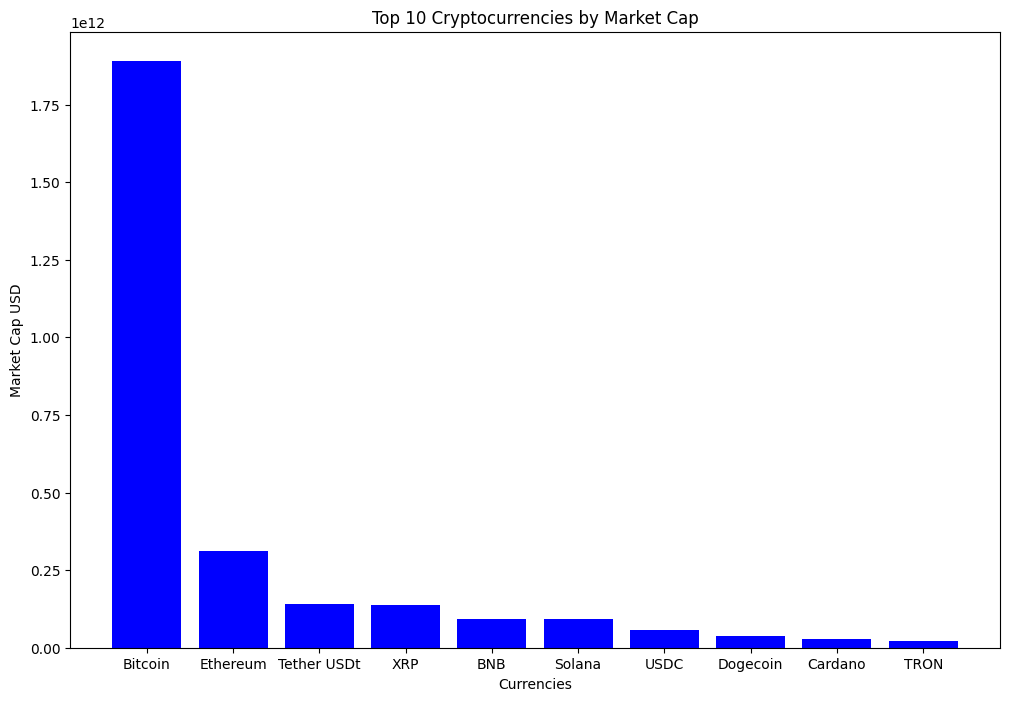

In [193]:
import matplotlib.pyplot as plt
import pandas as pd

top10_crypto = [currency["name"] for currency in data2["data"]]
top10_marketcap = [market["quote"]["USD"]["market_cap"] for market in data2["data"]]

df = pd.DataFrame({"name": top10_crypto, "market_cap":top10_marketcap})

chart_list = df.sort_values(by="market_cap", ascending=False).head(10)

plt.figure(figsize=(12, 8))
plt.bar(chart_list["name"], chart_list["market_cap"], color='blue')
plt.xlabel("Currencies")
plt.ylabel("Market Cap USD")
plt.title("Top 10 Cryptocurrencies by Market Cap")
plt.show()
